<h1 style="text-align:center">
    Estadísticas de Accidentes en Madrid
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Esther Fernández Barchín
</h3>
    
<h3 style="text-align:center">
    17 de mayo de 2022
</h3>

<hr>

## Introducción

<font color="darkblue"> En este proyecto se desarrolla en Python un análisis básico de datos sobre accidentes de tráfico de la Comunidad de Madrid. Los datos provienen del portal de datos abiertos del Ayuntamiento de Madrid.
https://datos.madrid.es/portal/site/egob
Estos mismos están guardados en un archivo csv se ha extraído la información durante todo el desarrollo de la práctica.

A partir de ellos he realizado una serie de ejercicios que al llamar a las funciones,  me devolvían los resultados esperados.
He conseguido hacer la gran mayoría de ejercicios, pero no he podido realizar el ejercicio de map-reduce por falta de tiempo, además hay un error en la parte de pandas a utilizar la función rango_edad.
En algunos ejercicios se esperaba realizar con funciones pero no me ha hecho falta al sacar los resultados con algunas lineas de código, sobretodo en la parte de pandas que todo lo he desarrollado a partir de las funciones preestablecidas de la librería.
</font>



## Librerías

<font color="darkblue">
Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.    
</font>

In [57]:
from typing import List, Tuple, Any, Dict, Optional
import datetime as dt
import csv
import pandas as pd
import matplotlib.pyplot as plt

## a) Algunas operaciones sencillas [2 puntos]

Vamos a trabajar con una tabla del INE que contiene información sobre el paro en España. Abriendo el archivo, vemos algo así:

<center>
    <img src="./images/tabla_1.png" width="800">
</center>

Si miramos una línea de esta tabla (salvo la primera, que es la cabecera), encontamos lo siguiente:
    
<table>
  <tr>
    <th>2020S000073</th>
    <th>01/01/2020</th>
    <th>18:48</th>
    <th>AVDA. PIO XII</th>
    <th>81</th>
    <th>CHAMARTÍN</th>
    <th>Atropello a persona</th>
    <th>Despejado</th>
    <th>Turismo</th>
    <th>Conductor</th>
    <th>DE 55 A 59 AÑOS</th>
    <th>Hombre</th>
    <th>14</th>
    <th> </th>
  </tr>
</table>

Pero si inspeccionamos el archivo con un editor de texto, vemos que esa línea es como sigue:

    2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Una cadena de caracteres. Hagamos en Python algunas operaciones básicas con los algunos de los datos anteriores y con la cadena en sí.

**a.1 Redondeo de la hora**

La primera operación consiste en redondear una hora, simplemente despreciando los minutos y dando lugar al entero correspondiente, entre 0 y 23. 

In [58]:
# Esta celda debe ser completada por el estudiante
def redondeo_hora(d: str) -> int:
    """
    La función redondea la hora si los minutos son mayores a 30, se redondea la hora a una superior,
    en  caso contrario de que los minutos sean menores de 30 devuelve la hora inicial

    Parameters
    ----------
    d[string]
    formato de la hora : "%H:%M"

    Returns
    ---------
    (int) con  formato "%H"

    """
    t: dt.datetime = dt.datetime.strptime(d,"%H:%M")
    return t.hour if t.minute < 30 else t.hour + 1

In [59]:
# Pruebas de funcionamiento:
redondeo_hora('12:48')


13

Es bastante habitual hacer varias pruebas a la vez:

In [60]:
# Pruebas de funcionamiento:

for h in ['15:00', '23:15', '14:22', '9:34']:
    print(redondeo_hora(h))

15
23
14
10


**a.2 Rangos de edad**

Ahora, deseamos codificar los rangos de edad, asignando a cada rango descrito un intervalo de dos enteros. El ejemplo de funcionamiento te aclarará lo que se pide exactamente: 

In [61]:
# Esta celda debe ser completada por el estudiante
def rango_edad(c: str) -> Tuple[int,int]:
    """
    Función que lee el rango de edad como string y devuelve una tupla numérica que almacena 
    en su primera posición el valor desde y en su segunda posición el valor hasta del rango de edad.

    Parameters
    ----------
    string

    Returns
    ----------
    tuple(int,int)
    edades mínima y máximo del rango
    
    """
    c = c.upper()
    if "DE " in c and " A " in c and " AÑOS" in c:
        L = c.split(" ")
        return (int(L[1]), int(L[3]))
    elif "MAYOR DE " in c and " AÑOS" in c:
        return (int(c.split(" ")[2]) + 1, 100)
    elif "DESCONOCIDA" in c:
        return (-1, -1)
    else:
        raise Exception("ERROR")




In [62]:
rango_edad("DE 25 A 29 AÑOS")

(25, 29)

In [63]:
rango_edad("DESCONOCIDA")

(-1, -1)

In [64]:
rango_edad("MAYOR DE 74 AÑOS")

(75, 100)

In [65]:
# Pruebas de funcionamiento:

for c in  ['DE 25 A 29 AÑOS', 'DESCONOCIDA', 'MAYOR DE 74 AÑOS']:
    print(c, " -> ", rango_edad(c))

DE 25 A 29 AÑOS  ->  (25, 29)
DESCONOCIDA  ->  (-1, -1)
MAYOR DE 74 AÑOS  ->  (75, 100)


**a.3 Lesividad: datos en blanco**

El dato de lesividad viene codificado con un entero:

    01 Atención en urgencias sin posterior ingreso. - LEVE
    02 Ingreso inferior o igual a 24 horas - LEVE
    ...
    77 Se desconoce
    En blanco Sin asistencia sanitaria
    
Deseamos convertir este dato en un número entero. Cuando no se requiere asistencia sanitaria vamos a codificar esto con el entero 0 por homogeneidad. Cuando la lesividad no se conoce (un dato missing por ejemplo), también la consignaremos con un cero.

In [66]:
# Esta celda debe ser completada por el estudiante
def lesividad(c: str) -> int:
    """
    Función que transforma un dato string a un número entero

    Parameters
    ----------
    str

    Returns
    --------
    int
    """
    return 0 if len(c) == 0 else int(c)


In [67]:
lesividad('02')

2

In [68]:
# Pruebas de funcionamiento:

for c in  ['01', '02', '14', '', '77']:
    print(c, " -> ", lesividad(c))

01  ->  1
02  ->  2
14  ->  14
  ->  0
77  ->  77


**a.4 Operaciones con una línea de datos**

Si ahora abres el archivo de datos con un editor de texto, podrás ver algo parecido a lo siguiente:

<center>
    <img src="./images/tabla_2.png" width="800">
</center>

La línea novena es la que poníamos antes como ejemplo. Vista como una cadena de caracteres, podemos almacenarla en una variable para procesarla:


    linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"

Y luego, podríamos hacer con ella algunas operaciones básicas, separando sus piezas (con el método `split`), extrayendo alguna que nos interese (accediendo a la componente adecuada con el corchete `[...]`, y estas piezas se pueden manejar con las funciones definicas antes, `redondeo_hora` y `rango_edad`.

En una primera versión, esto puede hacerse con una función que va imprimiendo las cosas, así:

    def presentar_operaciones_basicas(cadena):
        print("La cadena de entrada: ")
        print(cadena)
        print()
        print("Piezas: ")
        ...

In [69]:
# Esta celda debe ser completada por el estudiante
def presentar_operaciones_basicas(cadena : str):
    """
    Función que imprime una parte de texto e imprime las partes que nos interesa de una línea de texto como
    una cadena de caracteres y aplica las funciones anteriormente descritas para obtener el resultado esperado

    Parameters
    ----------
    cadena -> str
    
    """
    print("La cadena de entrada: ")
    print(cadena)
    print()
    print("Piezas: ")
    print(cadena.split(';'))
    print()
    print("Distrito: ")
    distrito = cadena.split(';')
    print(distrito[5])
    print()
    print("La hora, sin y con redondeo: ")
    hora = cadena.split(';')
    print(hora[2])
    print(redondeo_hora(hora[2]))
    print()
    print("La edad tal y como viene y su rango: ")
    edad = cadena.split(';')
    print(edad[10])
    print(rango_edad(edad[10]))


In [70]:
# Ejemplo de funcionamiento:

linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"
presentar_operaciones_basicas(linea_9)

La cadena de entrada: 
2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Piezas: 
['2020S000073', '01/01/2020', '18:48', 'AVDA. PIO XII', '81', 'CHAMARTÍN', 'Atropello a persona', 'Despejado', 'Turismo', 'Conductor', 'DE 55 A 59 AÑOS', 'Hombre', '14', '', '']

Distrito: 
CHAMARTÍN

La hora, sin y con redondeo: 
18:48
19

La edad tal y como viene y su rango: 
DE 55 A 59 AÑOS
(55, 59)


Decíamos que, en una primera versión, esto puede hacerse con una función que va imprimiendo las cosas. 
Pero realmente, no es el estilo deseable. Preferimos una función que no escriba nada, que devuelva su resultado con `return`. Y de paso, que devuelva únicamente las piezas que nos interesan, por ejemplo: la hora (redondeada), el distrito, el estado meteorológico, el rango de edad y el nivel (entero) de lesividad del accidente.

(Lógicamente, según el objetivo que nos interese, podría ser necesario luego cargar unos campos u otros.)

In [71]:
# Esta celda debe ser completada por el estudiante
def extraer_datos(cadena: str):
    """
    Utiliza las funciones anteriormente descritas para devolver una lista con los valores extraídos 
    
    Parameters
    ----------
    str

    Returns
    list[int]
    devuelve una lista con cada elemento de la lista que ha leido la función
    """
    return [
        redondeo_hora(cadena.split(';')[2]),
        (cadena.split(';')[5]),
        (cadena.split(';')[7]),
        rango_edad(cadena.split(';')[10]),
        lesividad(cadena.split(';')[12])
    ]
    

In [72]:
# Pruebas de funcionamiento:

print(len(linea_9.split(";")))
print(extraer_datos(linea_9))

15
[19, 'CHAMARTÍN', 'Despejado', (55, 59), 14]


## b) Lectura de datos del archivo [2 puntos]

En este apartado te planteo diseñar tres funciones de lectura de datos.

**b.1. Cabecera** La primera función leerá la cabecera del archivo de datos, esto es, su primera línea, y la descompondrá en los rótulos correspondientes a cada columna. Además de abrir el archivo (preferiblemente con la instrucción `with open...`), bastará con un único `readline`.

In [73]:
# Esta celda debe ser completada por el estudiante
with open("2020_Accidentalidad.csv", mode = "r", encoding = "iso-8859-1") as f:
    cabecera = f.readline().split(";")
cabecera


['Nº  EXPEDIENTE',
 'FECHA',
 'HORA',
 'CALLE',
 'NÚMERO',
 'DISTRITO',
 'TIPO ACCIDENTE',
 'ESTADO METEREOLÓGICO',
 'TIPO VEHÍCULO',
 'TIPO PERSONA',
 'RANGO DE EDAD',
 'SEXO',
 'LESIVIDAD*',
 '',
 '\n']

In [74]:
#Pruebas de funcionamiento:
#No he definido ninguna función por lo que no he utilizado la prueba de funcionamiento
#cabecera = cargar_cabecera("2020_Accidentalidad.csv")
#print(cabecera)

**b.2 Lectura de algunas líneas del archivo**

Ahora, nos interesa leer justamente los datos a partir de la cabecera, esto es algunas de las demás líneas. Una forma de saltarnos esa primera línea es usar la instrucción `next`. Pongamos que queremos leer desde la línea $17$ hasta la $23$. Podemos leer (sin procesar) $17-1$ líneas y luego, podemos leer y retener $23-17+1$ líneas.

In [75]:
# Esta celda debe ser completada por el estudiante
def cargar_lineas(file: str, line1: int = 0, line2: int = 10):
    """
    Lee el archivo csv de la cual se salta la cabecera y crea una lista donde va acumulando las lineas y en cada
    linea se extrae la información que se desea gracias a la función anterior

    Parameters
    ----------
    file -> str object
    line1 -> int (es un parámetro opcional)
    line2 -> int (es un parámetro opcional)

    Returns
    -------
    list()
    siempre retornará un máximo de 10 líneas
    """
    acc = []
    with open(file, mode = "r", encoding = "iso-8859-1") as f:
        next(f)
        for i,line in enumerate(f):
            if i >= line1 and i < line2:
                acc.append(extraer_datos(line.strip()))
    return acc

#Asumiendo que la linea 0 de datos existe    

In [76]:
lineas_lista = cargar_lineas("2020_Accidentalidad.csv", 17, 23)

for line in lineas_lista:
    print(line)
    
# Si no decimos qué líneas nos interesa, se cargarán las diez primeras.
# (Esto puede hacerse con dos parámetros por defecto.)



[17, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 2]
[16, 'HORTALEZA', 'Despejado', (21, 24), 14]
[16, 'HORTALEZA', 'Despejado', (18, 20), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]


In [77]:
lineas_lista = cargar_lineas("2020_Accidentalidad.csv")

for linea in lineas_lista:
    print(linea)

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[23, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[20, 'CENTRO', 'Despejado', (-1, -1), 0]
[20, 'CARABANCHEL', 'Despejado', (-1, -1), 14]
[20, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[19, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[19, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[19, 'ARGANZUELA', '', (55, 59), 14]


**b.3 Lectura de todas las líneas del archivo**

Lo normal es desear cargar **todos** los datos de un archivo, y no sólo unas pocas líneas, excluyendo la cabecera. Al igual que en la función anterior, te pido que el resultado se dé en una lista, donde cada elemento recoge la información de una línea del archivo de datos, salvo la cabecera, pero incluyendo ahora **todas** esas líneas, sin dar opción a cuáles nos interesa, aunque luego deseemos mostrar tan solo unas pocas. Véanse ambas pruebas de funcionamiento. 

In [78]:
# Esta celda debe ser completada por el estudiante
def cargar_datos(file):
    """
    Carga todas las lineas a partir del encabezado del archivo y aplica la fórmula previamente descrita 

    Parameters
    ----------
    file -> documento a cargar

    Returns
    -------
    list()
    
    """
    acc = []
    with open(file, mode = "r", encoding = "iso-8859-1") as f:
        lines = f.readlines()[1:]
        return [extraer_datos(line.strip()) for line in lines]

In [79]:
# Pruebas de funcionamiento:


datos_lista = cargar_datos("2020_Accidentalidad.csv")

for linea in datos_lista:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[23, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[20, 'CENTRO', 'Despejado', (-1, -1), 0]
[20, 'CARABANCHEL', 'Despejado', (-1, -1), 14]
[20, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[19, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[19, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[19, 'ARGANZUELA', '', (55, 59), 14]
[19, 'ARGANZUELA', '', (35, 39), 14]
[17, 'HORTALEZA', 'Despejado', (40, 44), 0]
[17, 'HORTALEZA', 'Despejado', (30, 34), 0]
[17, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[17, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 14]
[17, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 2]
[17, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 2]
[17, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 2]
[16, 'HORTALEZA', 'Despejado', (21, 24), 14]
[16, 'HORTALEZA', 'Despejado', (18, 20), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despej

In [80]:
# Pruebas de funcionamiento:

for linea in datos_lista[0:4]:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[23, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]


## c) Accidentalidad y mortalidad por edad [2 puntos]

**c.1. Accidentalidad. Cómputo básico**

Deseamos totalizar el número de accidentes de nuestra tabla por cada rango de edad. Para ello, te pido que uses un diccionario en el que la clave es el rango de edad y el valor, el total de accidentes para dicho rango de edad. Ahora, las posibilidades son dos:

1. Cada accidente actualiza el diccionario así: si ese rango de edad no está en el diccionario, se añade con un total de un accidente; si ya está, se añade una unidad más al tltal de accidentes de dicho rango de edad

2. Con un diccionario con el valor 0 por defecto.

In [81]:
df = pd.read_csv("2020_Accidentalidad.csv",header = 0,sep = ";",encoding = "iso-8859-1",na_values=' ')
edad = list(df.iloc[:,10])
mapa_edad = list(map(rango_edad, edad))


In [82]:
# Esta celda debe ser completada por el estudiante
def totales(lista):
    """
    Crea un diccionario desde 0 y para cada elemento único,es decir,el rango
    establecido como clave, le suma uno, y devuelve una tupla y un entero

    Parameters
    ----------
    lista -> list

    Returns
    ----------
    tuple(int,int),int
    """
    diccionario = {}
    for elemento in lista:
        clave = elemento
        valor = lista.count(clave)
        diccionario[clave] = valor

    return diccionario

In [83]:
#Pruebas de funcionamiento

total_accidentes_por_edades = totales(mapa_edad)

for k, e in total_accidentes_por_edades.items():
    print(k, e)

(25, 29) 3437
(21, 24) 2226
(45, 49) 3084
(-1, -1) 3962
(55, 59) 2077
(18, 20) 978
(35, 39) 3332
(40, 44) 3399
(30, 34) 3362
(50, 54) 2547
(60, 64) 1272
(65, 69) 641
(15, 17) 250
(70, 74) 427
(75, 100) 657
(0, 5) 289
(6, 9) 175
(10, 14) 305


**c.2. Accidentalidad con mortalidad**

Deseamos recopilar, para cada rango de edad, el total de accidentes registrados en nuestra tabla, junto con el número de dichos accidentes que han resultado ser mortales. El cociente (multiplicado por mil) nos dará la tasa de accidentes mortales por cada mil accidentes.

In [84]:
# Esta celda debe ser completada por el estudiante

def totales_mortales(datos_lista):
    """
    Función que crea un diccionario y si encuentra un rango de edad que no está dentro del diccionario, 
    le suma uno. y  en el siguiente elemento de la tupla  suma uno  si ese accidente es mortal (lesividad = 4)

    Parameters
    ---------
    lista

    Returns
    --------
    list(tuple,tuple)
    
    """
    diccionario = {}
    for row in datos_lista:
        age_range = row[3]
        lesividad = row[4]
        if age_range in diccionario:
            diccionario[age_range] = (
                diccionario[age_range][0] + 1,
                diccionario[age_range][1] + int(lesividad == 4)
            )
        else:
            diccionario[age_range] = (
                1, int(lesividad == 4)
            )
    return [(k,v) for k,v in diccionario.items()]

Observa que la función `totales_mortales` devuelve una lista, y no un diccionario.

In [85]:
# Prueba de funcionamiento:

total_accidentes_y_muertes_por_edades = totales_mortales(datos_lista)

for edades, dos_totales in total_accidentes_y_muertes_por_edades:
    print(edades, dos_totales)
    
print()

# Total accidentes mortales / 1000 accidentes, por rangos de edad:

tasa_accidentes_mortales_por_mil = [(k, m*1000/n) for k, (n, m) in total_accidentes_y_muertes_por_edades]
                                    
for k_tasa  in tasa_accidentes_mortales_por_mil:
    print(k_tasa)                           

(25, 29) (3437, 3)
(21, 24) (2226, 2)
(45, 49) (3084, 4)
(-1, -1) (3962, 0)
(55, 59) (2077, 1)
(18, 20) (978, 0)
(35, 39) (3332, 8)
(40, 44) (3399, 6)
(30, 34) (3362, 2)
(50, 54) (2547, 1)
(60, 64) (1272, 1)
(65, 69) (641, 1)
(15, 17) (250, 0)
(70, 74) (427, 1)
(75, 100) (657, 4)
(0, 5) (289, 1)
(6, 9) (175, 0)
(10, 14) (305, 0)

((25, 29), 0.8728542333430317)
((21, 24), 0.8984725965858041)
((45, 49), 1.297016861219196)
((-1, -1), 0.0)
((55, 59), 0.4814636494944632)
((18, 20), 0.0)
((35, 39), 2.4009603841536613)
((40, 44), 1.7652250661959399)
((30, 34), 0.594883997620464)
((50, 54), 0.39261876717707106)
((60, 64), 0.7861635220125787)
((65, 69), 1.5600624024960998)
((15, 17), 0.0)
((70, 74), 2.34192037470726)
((75, 100), 6.0882800608828)
((0, 5), 3.4602076124567476)
((6, 9), 0.0)
((10, 14), 0.0)


## d) Algunas gráficas [1.5 puntos]


**d.1 Un modelo de gráfica.** Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [90]:
# Esta celda debe ser completada por el estudiante
def representar_xxx_yyy(lista_original: List[Tuple[float,float]], lista_de_str: Optional[List[str]] = None):
    """
    Función que sirve para configurar el gráfico, en el cual añade de una lista de tuplas las transforma en dos ejes
    el de la x y la y y crea un gráfico

    Parameters
    -----------
    list[Tuple[float,float]]
    optional[List[str]] 

    Return
    ---------
    graph
    """
    x,y = zip(*lista_original)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.grid(axis='both')
    plt.xticks(rotation = 45)
    if lista_de_str != None:
        ax.set_title(lista_de_str[0])
        ax.set_xlabel(lista_de_str [2])
        ax.set_ylabel(lista_de_str [1])
           

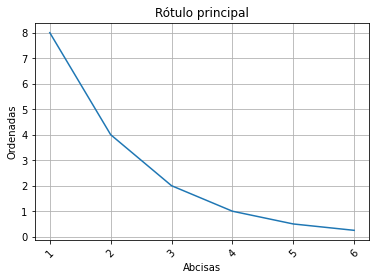

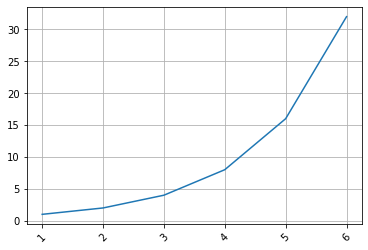

In [91]:
# Pruebas de funcionamiento:

representar_xxx_yyy(
    lista_original = [
        (1, 8), 
        (2, 4), 
        (3, 2), 
        (4, 1), 
        (5, 0.5), 
        (6, 0.25)
    ], 
    lista_de_str = [
        "Rótulo principal", 
        "Ordenadas", 
        "Abcisas"
    ]
)

representar_xxx_yyy(
    lista_original = [
        (1, 1), 
        (2, 2), 
        (3, 4), 
        (4, 8), 
        (5, 16), 
        (6, 32)
    ]
)

**d.2. Tasas de muerte por edades** 

Queremos aplicar nuestro modelo de gráfica a la representación de las tasas de accidentes mortales por edad, que hemos calculado un poco antes. Pero obtenemos una gráfica poco adecuada, porque las edades (las abcisas) están en un orden arbitrario.

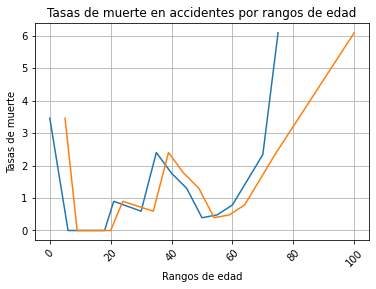

In [ ]:
# Intento de representación:

rotulos = "Tasas de muerte en accidentes por rangos de edad", "Tasas de muerte", "Rangos de edad"
representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

Para remediar esto se ha de reordenar la lista de pares absisa-ordenada, atendiendo a las abcisas. También, el elemento de abcisa (-1, -1) se ha de suprimir. Esto es lo que te pido.

In [ ]:
def ordena_tupla(t):
  """
  Función que ordena una tupla de menor a mayor, en la cual crea una lista desde cero en la que va
  metiendo cada elemento y lo va ordenando, al final devuelve una tupla

  Parameters
  ----------
  t as tuple

  Return
  --------
  tuple
  """
  lista=list()
  for i in t:
    lista.append(i)
  lista.sort()
  t=tuple(lista)
  return t


In [ ]:
tasa_accidentes_mortales_por_mil = ordena_tupla(tasa_accidentes_mortales_por_mil)


In [ ]:
#Aquí quitamos la linea correspondiente a (-1,-1)
tasa_accidentes_mortales_por_mil = tasa_accidentes_mortales_por_mil[1:]

In [ ]:
# Esta celda debe ser completada por el estudiante
def representar_xxx_yyy1(lista_original,lista_de_str :str):
    """
    Función que representa un gráfico en la cual la x es una tupla y la y un valor, además la x se ha 
    de transformar en str para poderlo poner como etiqueta en el eje de las abscisas 
    
    Parameters
    ----------
    list
    list(str)

    Return
    ---------
    Graphic
    """
    x = list(map(lambda x: x[0], lista_original))
    y = list(map(lambda x: x[1], lista_original))
    fig, ax = plt.subplots()
    ax.plot([str(i) for i in x], y)
    ax.grid(axis='both')
    plt.xticks(rotation = 45)
    ax.set_title(lista_de_str[0])
    ax.set_xlabel(lista_de_str[2])
    ax.set_ylabel(lista_de_str[1])  


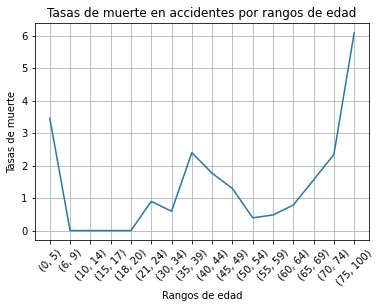

In [ ]:
# Prueba de funcionamiento:

representar_xxx_yyy1(tasa_accidentes_mortales_por_mil, rotulos)

**d.3. Tasas de muerte por rangos horarios** 

De forma similar a lo resuelto en los apartados anteriores, deseamos preparar los datos y un gráfico con la tasa de muerte por rangos horarios. En lugar de tratar los rangos por horas enteras (las 4 representa el intervalo entre las 4:00 y las 4:59), deseamos representar de dos en dos horas (las 4 representa el intervalo entre las 4:00 y las 5:59, las 6, entre las 6:00 y las 7:59, etc.) 

Observa que se necesitan dos funciones, una para recopilar los datos, calcular las tasas, dar  una lista ordenada, etc., y otra para preparar las abcisas, cadenas de caracteres con las horas de dos en dos, junto con sus tasas respectivas.

In [ ]:
# Esta celda debe ser completada por el estudiante
def totales_mortales_por_horario(datos_lista: List[List[Any]]) -> List[Tuple[int,float]]:
    """
    Función que crea un diccionario para devolver la hora cada dos horas y 
    devuelve una lista de una tupla con un valor int y un
    valor float además de ordenar el rango de las horas

    Parameters
    ----------
    lista

    Return
    ------
    list(tuple[int,float])
    int como las horas
    float como la tasa de mortalidad en los accidentes

    
    """
    diccionario: Dict[int,Tuple[int,int]] = {}
    for row in datos_lista:
        hour: int = row[0]
        lesividad: int = row[4]
        hour_range: int = hour if hour % 2 == 0 else hour - 1
        if hour_range in diccionario:
            diccionario[hour_range] = (
                diccionario[hour_range][0] + 1,
                diccionario[hour_range][1] + int(lesividad == 4)
            )
        else:
            diccionario[hour_range] = (
                1, int(lesividad == 4)
            )   
    return sorted([
        (
            k,
            (v[1]/v[0]) * 100
        ) 
    for k,v in diccionario.items()], key = lambda elem: elem[0], reverse = False)

In [ ]:
tasas_accidentes_y_muertes_por_horario = totales_mortales_por_horario(datos_lista)

print(tasas_accidentes_y_muertes_por_horario)

[(0, 0.23237800154918667), (2, 0.35335689045936397), (4, 0.20202020202020202), (6, 0.11641443538998836), (8, 0.08316008316008316), (10, 0.12014417300760913), (12, 0.11524056467876692), (14, 0.11590171534538712), (16, 0.07680491551459294), (18, 0.02257336343115124), (20, 0.13398838767306834), (22, 0.10676156583629894), (24, 0.0)]


In [ ]:
def emparejar_abcisas(tasas_accidentes_y_muertes_por_horario: List[Tuple[int,float]]) -> List[Tuple[str,float]]:
    """
    Función que junta el rango de las horas cada dos horas transformandola de int a str
    Parameters
    ----------
    list[tuple(int,float)]

    Returns
    list[tuple(str,float)]
    """
    return [(
        "(" + str(elem[0]) + ", " + str(elem[0] + 2) + ")",
        elem[1]
    ) for elem in tasas_accidentes_y_muertes_por_horario]

[(0, 0.23237800154918667), (2, 0.35335689045936397), (4, 0.20202020202020202), (6, 0.11641443538998836), (8, 0.08316008316008316), (10, 0.12014417300760913), (12, 0.11524056467876692), (14, 0.11590171534538712), (16, 0.07680491551459294), (18, 0.02257336343115124), (20, 0.13398838767306834), (22, 0.10676156583629894), (24, 0.0)]

[('(0, 2)', 0.23237800154918667), ('(2, 4)', 0.35335689045936397), ('(4, 6)', 0.20202020202020202), ('(6, 8)', 0.11641443538998836), ('(8, 10)', 0.08316008316008316), ('(10, 12)', 0.12014417300760913), ('(12, 14)', 0.11524056467876692), ('(14, 16)', 0.11590171534538712), ('(16, 18)', 0.07680491551459294), ('(18, 20)', 0.02257336343115124), ('(20, 22)', 0.13398838767306834), ('(22, 24)', 0.10676156583629894), ('(24, 26)', 0.0)]


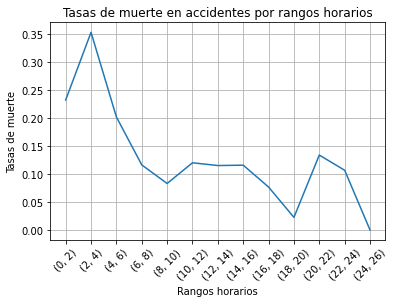

In [ ]:
# Prueba de funcionamiento:

tasas_accidentes_y_muertes_por_horario = totales_mortales_por_horario(datos_lista)

print(tasas_accidentes_y_muertes_por_horario)

print()

datos_para_grafica = emparejar_abcisas(tasas_accidentes_y_muertes_por_horario)

print(datos_para_grafica)

rotulos = "Tasas de muerte en accidentes por rangos horarios", "Tasas de muerte", "Rangos horarios"
representar_xxx_yyy(datos_para_grafica, rotulos)

## e) Operaciones con dataframes [1.5 puntos]

En este apartado, vamos a trabajar con tablas de la librería `pandas`, llamadas `dataframes`.

**e1. Carga del dataframe.**
La primera operación que necesitamos es cargar el archivo de datos en una tabla, como se ve en el siguiente ejemplo.

In [ ]:
# Esta celda debe ser completada por el estudiante
df = pd.read_table("2020_Accidentalidad.csv",header = 0,sep = ";",encoding = "iso-8859-1",na_values=' ')
df1 = pd.DataFrame(df)
tabla_pre = df1.iloc[:,[2,5,10,12]]


In [ ]:
#tabla_pre = cargar_dataframe_v0("2020_Accidentalidad.csv")
tabla_pre.head(20)


,HORA,DISTRITO,RANGO DE EDAD,LESIVIDAD*
0,23:15,RETIRO,DE 25 A 29 AÑOS,NaN
1,22:35,MONCLOA-ARAVACA,DE 21 A 24 AÑOS,6.0
2,20:15,FUENCARRAL-EL PARDO,DE 45 A 49 AÑOS,14.0
3,20:15,FUENCARRAL-EL PARDO,DE 25 A 29 AÑOS,7.0
4,19:45,CENTRO,DESCONOCIDA,NaN
5,19:30,CARABANCHEL,DESCONOCIDA,14.0
6,19:30,CARABANCHEL,DE 21 A 24 AÑOS,2.0
7,18:48,CHAMARTÍN,DE 55 A 59 AÑOS,14.0
8,18:48,CHAMARTÍN,DE 18 A 20 AÑOS,7.0
9,18:40,ARGANZUELA,DE 55 A 59 AÑOS,14.0


In [ ]:
tabla_pre.tail(20)

,HORA,DISTRITO,RANGO DE EDAD,LESIVIDAD*
32400,12:45,MONCLOA-ARAVACA,DE 45 A 49 AÑOS,NaN
32401,11:25,CHAMBERÍ,DE 35 A 39 AÑOS,14.0
32402,11:25,CHAMBERÍ,DE 55 A 59 AÑOS,2.0
32403,11:00,ARGANZUELA,DE 45 A 49 AÑOS,14.0
32404,11:00,ARGANZUELA,DE 30 A 34 AÑOS,14.0
32405,10:40,CHAMARTÍN,DESCONOCIDA,NaN
32406,10:40,CHAMARTÍN,DESCONOCIDA,NaN
32407,9:05,CHAMARTÍN,DE 25 A 29 AÑOS,7.0
32408,9:05,CHAMARTÍN,DE 35 A 39 AÑOS,5.0
32409,2:55,SALAMANCA,DE 21 A 24 AÑOS,7.0


**e2. Carga del dataframe, codificando rangos de edad y lesividad.**
Ahora, queremos modificar esta lectura para que los rangos de edad se conviertan en el intervalo correspondiente. Además, vemos que el nivel de lesividad se ha leído directamente como un real, y las cadenas en blanco se han traducido a `NaN` (*Not a Number*). Queremos ponerlo como un entero, consistente en un 1 cuando hay lesividad. Cuando no se conoce la lesividad, o no hay lesividad (casos codificados con un 0, un 77, un 14), anotamos un 0 en la tabla.

In [ ]:
#Para mitigar el fallo de kernel

pd.set_option('mode.chained_assignment', None)

In [ ]:
tabla_pre.loc[:,'LESIVIDAD*'] = tabla_pre.loc[:,'LESIVIDAD*'].fillna(0)
tabla_pre.loc[:,'LESIVIDAD*'] = tabla_pre.loc[:,'LESIVIDAD*'].astype(int)
tabla_pre.loc[:,'LESIVIDAD*'] = tabla_pre.loc[:,'LESIVIDAD*'].replace([0, 77, 14], 0)
tabla_pre.loc[:,'LESIVIDAD*'] = tabla_pre.loc[:,'LESIVIDAD*'].replace([1,2,3,4,5,6,7],1)
tabla_pre.loc[:,'RANGO DE EDAD'] = tabla_pre.loc[:,'RANGO DE EDAD'].apply(rango_edad)


AttributeError: 'tuple' object has no attribute 'upper'

In [ ]:
tabla = tabla_pre

In [ ]:
#tabla = cargar_dataframe("2020_Accidentalidad.csv")
tabla

,HORA,DISTRITO,RANGO DE EDAD,LESIVIDAD*
0,23:15,RETIRO,"(25, 29)",0
1,22:35,MONCLOA-ARAVACA,"(21, 24)",1
2,20:15,FUENCARRAL-EL PARDO,"(45, 49)",0
3,20:15,FUENCARRAL-EL PARDO,"(25, 29)",1
4,19:45,CENTRO,"(-1, -1)",0
...,...,...,...,...
32415,0:18,CHAMARTÍN,"(35, 39)",0
32416,0:18,CHAMARTÍN,"(35, 39)",0
32417,0:18,CHAMARTÍN,"(35, 39)",0
32418,0:18,CHAMARTÍN,"(35, 39)",0


**e3. Tabla de número de accidentes por rangos de edad**

Nos interesa quedarnos únicamente con dos columnas: el rango de edad y el número de accidentes, formando una tabla nueva. Esta tabla debe mostrarse en orden ascendente de rango de edad.

In [ ]:
# Esta celda debe ser completada por el estudiante
df = pd.DataFrame(tabla.iloc[:,2])
df = df['RANGO DE EDAD'].value_counts().sort_index(ascending=True).to_frame(name = 'NumAccs').reset_index()
df = df.rename({'index': 'Edad'}, axis=1)

In [ ]:
df

,Edad,NumAccs
0,"(-1, -1)",3962
1,"(0, 5)",289
2,"(6, 9)",175
3,"(10, 14)",305
4,"(15, 17)",250
5,"(18, 20)",978
6,"(21, 24)",2226
7,"(25, 29)",3437
8,"(30, 34)",3362
9,"(35, 39)",3332


Esta tabla contiene el rango de edad $(-1, -1)$, que no nos interesa. Por eso preferimos descartar esta fila.

In [ ]:
# Esta celda debe ser completada por el estudiante
df = df.drop([0],axis=0)

In [ ]:
df

,Edad,NumAccs
1,"(0, 5)",289
2,"(6, 9)",175
3,"(10, 14)",305
4,"(15, 17)",250
5,"(18, 20)",978
6,"(21, 24)",2226
7,"(25, 29)",3437
8,"(30, 34)",3362
9,"(35, 39)",3332
10,"(40, 44)",3399


**e4. Accidentes con consecuencias médicas.**

Queremos totalizar ahora los accidentes que requieren algún tipo de atención sanitaria o con resultado de muerte por cada rango de edad.

In [ ]:
# Esta celda debe ser completada por el estudiante
df1 = pd.DataFrame(tabla.iloc[:,2:4])
df_cond=df1['LESIVIDAD*']== 1
filtered_df = df1[df_cond]
filtered_df = filtered_df.drop(['LESIVIDAD*'],axis=1)
filtered_df = filtered_df['RANGO DE EDAD'].value_counts().sort_index(ascending=True).to_frame(name = 'NumAccsConLesiones').reset_index()
filtered_df = filtered_df.rename({'index': 'Edad'}, axis=1)
df1 = filtered_df.drop([0],axis=0)

In [ ]:
df1

,Edad,NumAccsConLesiones
1,"(0, 5)",107
2,"(6, 9)",73
3,"(10, 14)",135
4,"(15, 17)",114
5,"(18, 20)",325
6,"(21, 24)",720
7,"(25, 29)",1184
8,"(30, 34)",1098
9,"(35, 39)",944
10,"(40, 44)",899


**e5. Unión de dos tablas.**

Deseamos ahora combinar las dos tablas generadas, usando la columna "Edad" como pivote, al estilo de la operación `inner join` de SQL en el mundo de las bases de datos. 

In [ ]:
# Esta celda debe ser completada por el estudiante
df_union = pd.merge(df, df1, on='Edad')

In [ ]:
df_union

,Edad,NumAccs,NumAccsConLesiones
0,"(0, 5)",289,107
1,"(6, 9)",175,73
2,"(10, 14)",305,135
3,"(15, 17)",250,114
4,"(18, 20)",978,325
5,"(21, 24)",2226,720
6,"(25, 29)",3437,1184
7,"(30, 34)",3362,1098
8,"(35, 39)",3332,944
9,"(40, 44)",3399,899


**e6. Proporción de accidentes con lesiones.**

Deseamos ahora ver las cifras de lesiones en términos relativos, esto es, como el porcentaje  proporcióde accidentes en que se producen lesiones. 

In [ ]:
# Esta celda debe ser completada por el estudiante
df_union['PropLesiones'] = (df_union['NumAccsConLesiones']/df_union['NumAccs'])*100

In [ ]:
df_union

,Edad,NumAccs,NumAccsConLesiones,PropLesiones
0,"(0, 5)",289,107,37.024221
1,"(6, 9)",175,73,41.714286
2,"(10, 14)",305,135,44.262295
3,"(15, 17)",250,114,45.600000
4,"(18, 20)",978,325,33.231084
5,"(21, 24)",2226,720,32.345013
6,"(25, 29)",3437,1184,34.448647
7,"(30, 34)",3362,1098,32.659131
8,"(35, 39)",3332,944,28.331333
9,"(40, 44)",3399,899,26.448956


**e6. Gráfico.**

Finalmente, deseamos presentar la proporción de accidentes con lesiones por edades, por si al ver esto pudiéramos extraer alguna conclusión útil.

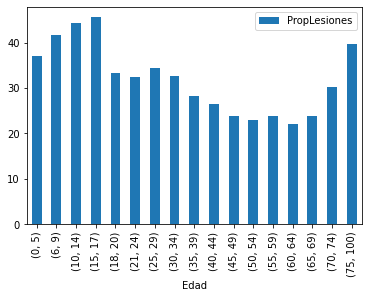

In [ ]:
# Esta celda debe ser completada por el estudiante
df_union.plot(x="Edad", y= "PropLesiones", kind="bar")
plt.show()

En conclusión, la proporción de lesiones es mayor en personas con una edad comprendida entre los 6-9 años hasta 15-17 años, además del grupo de edad comprendido entre los 75 y 100 años.

## f) Un cálculo masivo con map-reduce [0.5 puntos]

En este apartado se ha de realizar un programa aparte que calcule, para cada rango de edad, un par de enteros con los totales de podría activarse así desde la consola:

    C:\...> python total_accs_edad.py -q 2020_Accidentalidad.csv

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [ ]:
#Este ejercicio no he podido completarlo por falta de tiempo.

In [ ]:
# Hagamos una llamada al programa de consola desde aquí:

#! python total_accs_edad.py -q 2020_Accidentalidad.csv

In [ ]:
# Para que el resultado se almacene en un archivo:

#! python total_accs_edad.py -q 2020_Accidentalidad.csv  > accidentalidad_y_mortalidad_por_edades.txt

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`. Observaciones:

- La instrucción siguiente está comentada para ocultar una solución mía.
  Tú debes suprimir el símbolo `#` del comentario
  para mostrar tu solución aquí.
- Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [ ]:
#! type total_accs_edad.py

## g) Un apartado libre [0.5 puntos]

Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores, relacionado con el análisis de datos y con este proyecto. He aquí dos ejemplos posibles:

- Me he quedado un poco insatisfecho con el uso de pandas, un poco escaso: este apartado adicional podría usar dicha librería poniendo en juego algunas operaciones que no hemos visto.

- Tampoco me gusta mucho el acabado de las figuras:
  la librería Plotly puede ser quizá permitirte trazar figuras más
  profesionales, y una posibilidad sencilla es quizá
  importar los datos del archivo creado por el programa de map-reduce
  y representarlos gráficamente.
  
Estos ejemplos pueden servirte como pista, pero que no te limiten. Hay muchas otras posibilidades: geopandas, web scraping, etc.

En la evaluación, si este apartado está bien o muy bien, anota un 0.4. El 0,5 lo reservaremos para las situaciones en que se presente algo brillante, con alguna idea original o alguna técnica novedosa o complejidad especial o algún gráfico vistoso. Especialmente quien opta a un 9,5 o más, debe esmerarse en plantear este apartado a la altura de esa calificación.

<font color="darkblue">
La librería que mejor conozco es pandas, por lo que le daré alguna vuelta a la base de datos e incluso incluyendo un gráfico.


In [118]:
# ¿Con qué estado meteorológico hay más accidentes?
df = pd.read_table("2020_Accidentalidad.csv",header = 0,sep = ";",encoding = "iso-8859-1",na_values=' ')
df = df.iloc[:,[7,12]]
#Reutilizamos el código anterior para tratar la lesividad

In [119]:
df.loc[:,'LESIVIDAD*'] = df.loc[:,'LESIVIDAD*'].fillna(0)
df.loc[:,'LESIVIDAD*'] = df.loc[:,'LESIVIDAD*'].astype(int)
df.loc[:,'LESIVIDAD*'] = df.loc[:,'LESIVIDAD*'].replace([0, 77, 14], 0)
df.loc[:,'LESIVIDAD*'] = df.loc[:,'LESIVIDAD*'].replace([1,2,3,4,5,6,7],1)

In [120]:
df_cond=df['LESIVIDAD*']== 1
filtered_df = df[df_cond]


In [142]:
df_parte1 = filtered_df['ESTADO METEREOLÓGICO'].value_counts().to_frame(name = 'NumAccsConLesiones').reset_index()


In [148]:
df_parte1

,Estado,NumAccsConLesiones
0,Despejado,688300
1,Lluvia débil,60100
2,Nublado,50600
3,Se desconoce,15100
4,LLuvia intensa,10600
5,Granizando,200
6,Nevando,100


In [145]:
df_parte1 = df_parte1.rename({'index': 'Estado'}, axis=1)



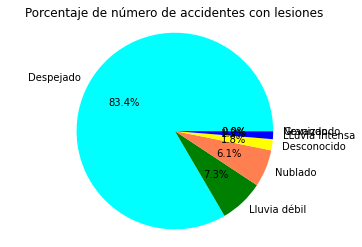

In [167]:
#Gráfico ( aunque no ha salido del todo bien)
etiquetas = ["Despejado", "Lluvia débil", "Nublado", "Desconocido", "LLuvia intensa","Granizando","Nevando"]
y = list(df_parte1["NumAccsConLesiones"])
colores = ['cyan','green','coral','yellow','blue','red','purple']
 
plt.pie(x=y, labels=etiquetas, colors = colores, autopct='%0.001f%%')
 
plt.title('Porcentaje de número de accidentes con lesiones')
plt.axis("equal")

plt.show()


### Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Fernández Barchín
-   **Nombre:** Esther
-   **Email:** estherfb_3397@hotmail.com
-   **Fecha:** 17 de mayo de 2022

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">

<font color="green">
**Comentarios sobre la autoevaluación**: 



<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.0  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |2.0  / 2.0  |Completamente resuelto |
|d)  |1.3 / 1.5  |El ejercicio está casi perfecto, pero el porcentaje del último apartado no está bien y no sé cómo calcularlo correctamente|
|e)  |1.3 / 1.5  |He conseguido hacer una gran parte de lo que quería,pero me sale error en una parte|
|f)  |0.0  / 0.5  |No me ha dado tiempo a realizar el ejercicio |
|g)  |0.2 / 0.5  |He conseguido hacer algo muy básico, nada extraordinario|
|**Total** |**8.9** / 10.0|**Notable**|

</font>

<font color="black">
    
### Ayuda recibida y fuentes utilizadas

- https://devcode.la/tutoriales/listas-python/#:~:text=Para%20saber%20cu%C3%A1ntas%20veces%20un,utilizar%20el%20metodo%20count().&text=Contamos%20cuantas%20veces%20se%20repite,lista%2C%20y%20esto%20devuelve%202
el apartado de diccionario el c he sacado el código de aquí

- https://www.codegrepper.com/code-examples/whatever/python+split+list+of+tuples+in+two+lists
- https://www.iteramos.com/pregunta/81943/convertir-una-lista-de-pares-en-dos-listas
- https://www.delftstack.com
- https://stackoverflow.com
- https://codepad.co/snippet/tuplas-agregar-eliminar-yordenar-elementos esto para el apartado d, la definicion de ordenar tupla viene de aquí

Además una persona de mi entorno me ha ayudado a hacer más eficientes algunas de las funciones y a definirlas mejor.Pero todo es de elaboración propia.

<font color="dark blue">




<br>
    
<font color="dark blue">

### Comentarios del alumno

Esta práctica me ha parecido muy interesante de abordar, ya que yo salgo de un nivel básico de Python, gracias a esta práctica he aprendido bastante y me ha aportado mucho, tanto que creo que estoy en un nivel ya intermedio.

Lo malo que para cada ejercicio me he pasado bastante tiempo para hacerlo y que me salieran los resultados correctos por lo que no he terminado la práctica y la parte del ejercicio libre está muy pobre en comparación con lo que me hubiera gustado obtener.

También me parece que la parte de documentación hay que darle alguna vuelta más pero he ido bastante justa de tiempo.
<font color="dark blue">


<br>

<font color="black">
    


<br>

In [93]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor